In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv")

df.head(5)

,Order date,SUBSIDIARY_CD,GLOBAL_NO,CLASSIFY_CD,CUST_CD,BRAND_CD,INNER_CD,SUPPLIER_CD,Sales order line number,Stock class,...,PACK QTY,WEIGHT PER PIECE,SUPPLIER_DIV,SPECIAL_DIV,SO_DAY_OF_MONTH,SO_DAY_OF_WEEK,REASON_CD,SOUF_RCV_NO,QTUF_RCV_NO,SO_TIME
0,2022-08-25,MJP,08344472000137,21031103,344472,OSA1,F7171260007,8121,8,1,...,0,1020,2.0,0,25,4,453.0,NaN,NaN,135557
1,2022-08-12,MJP,06000641365551,3712333,641,MSM1,30071630003,0263,1,1,...,0,120,1.0,0,12,5,451.0,NaN,NaN,134532
2,2022-07-08,MJP,07032167936864,21045918,32167,SMC1,F7499483132,9102,1,1,...,0,18000,3.0,0,8,5,410.0,NaN,NaN,160936
3,2022-07-08,MJP,01710046000973,21058302,710046,MIB1,F4524160001,9163,1,1,...,0,500,2.0,0,8,5,453.0,NaN,NaN,160702
4,2022-08-25,MJP,07107539916817,21050569,107539,NIQ1,F3017310155,9176,6,1,...,0,36,2.0,0,25,4,455.0,NaN,NaN,160244


In [7]:
# Xóa đi các cột không cần thiết

columns_to_drop = ["SO_TIME", "QTUF_RCV_NO", "SOUF_RCV_NO", "SPECIAL_DIV", "Sales order line number", "Stock class",
                   "SO QTY", "OTHER AREA SHIP DIV", "ALLOCATION QTY", ]


df = df.drop(columns=columns_to_drop, axis=1)

## Xóa bỏ các hàng có trị NaN

In [8]:
df_1 = df.dropna(axis = 0)

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21374 entries, 1 to 26216
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order date                       21374 non-null  object 
 1   SUBSIDIARY_CD                    21374 non-null  object 
 2   GLOBAL_NO                        21374 non-null  object 
 3   CLASSIFY_CD                      21374 non-null  int64  
 4   CUST_CD                          21374 non-null  int64  
 5   BRAND_CD                         21374 non-null  object 
 6   INNER_CD                         21374 non-null  object 
 7   SUPPLIER_CD                      21374 non-null  object 
 8   Consider count hodiday Saturday  21374 non-null  int64  
 9   SUPPLIER INV AMOUNT              21374 non-null  float64
 10  PACKING RANK                     21374 non-null  object 
 11  PRODUCT_CD                       21374 non-null  object 
 12  PRODUCT ATTRIBUTION    

In [10]:
df_plot = df_1.drop("Order date", axis = 1)

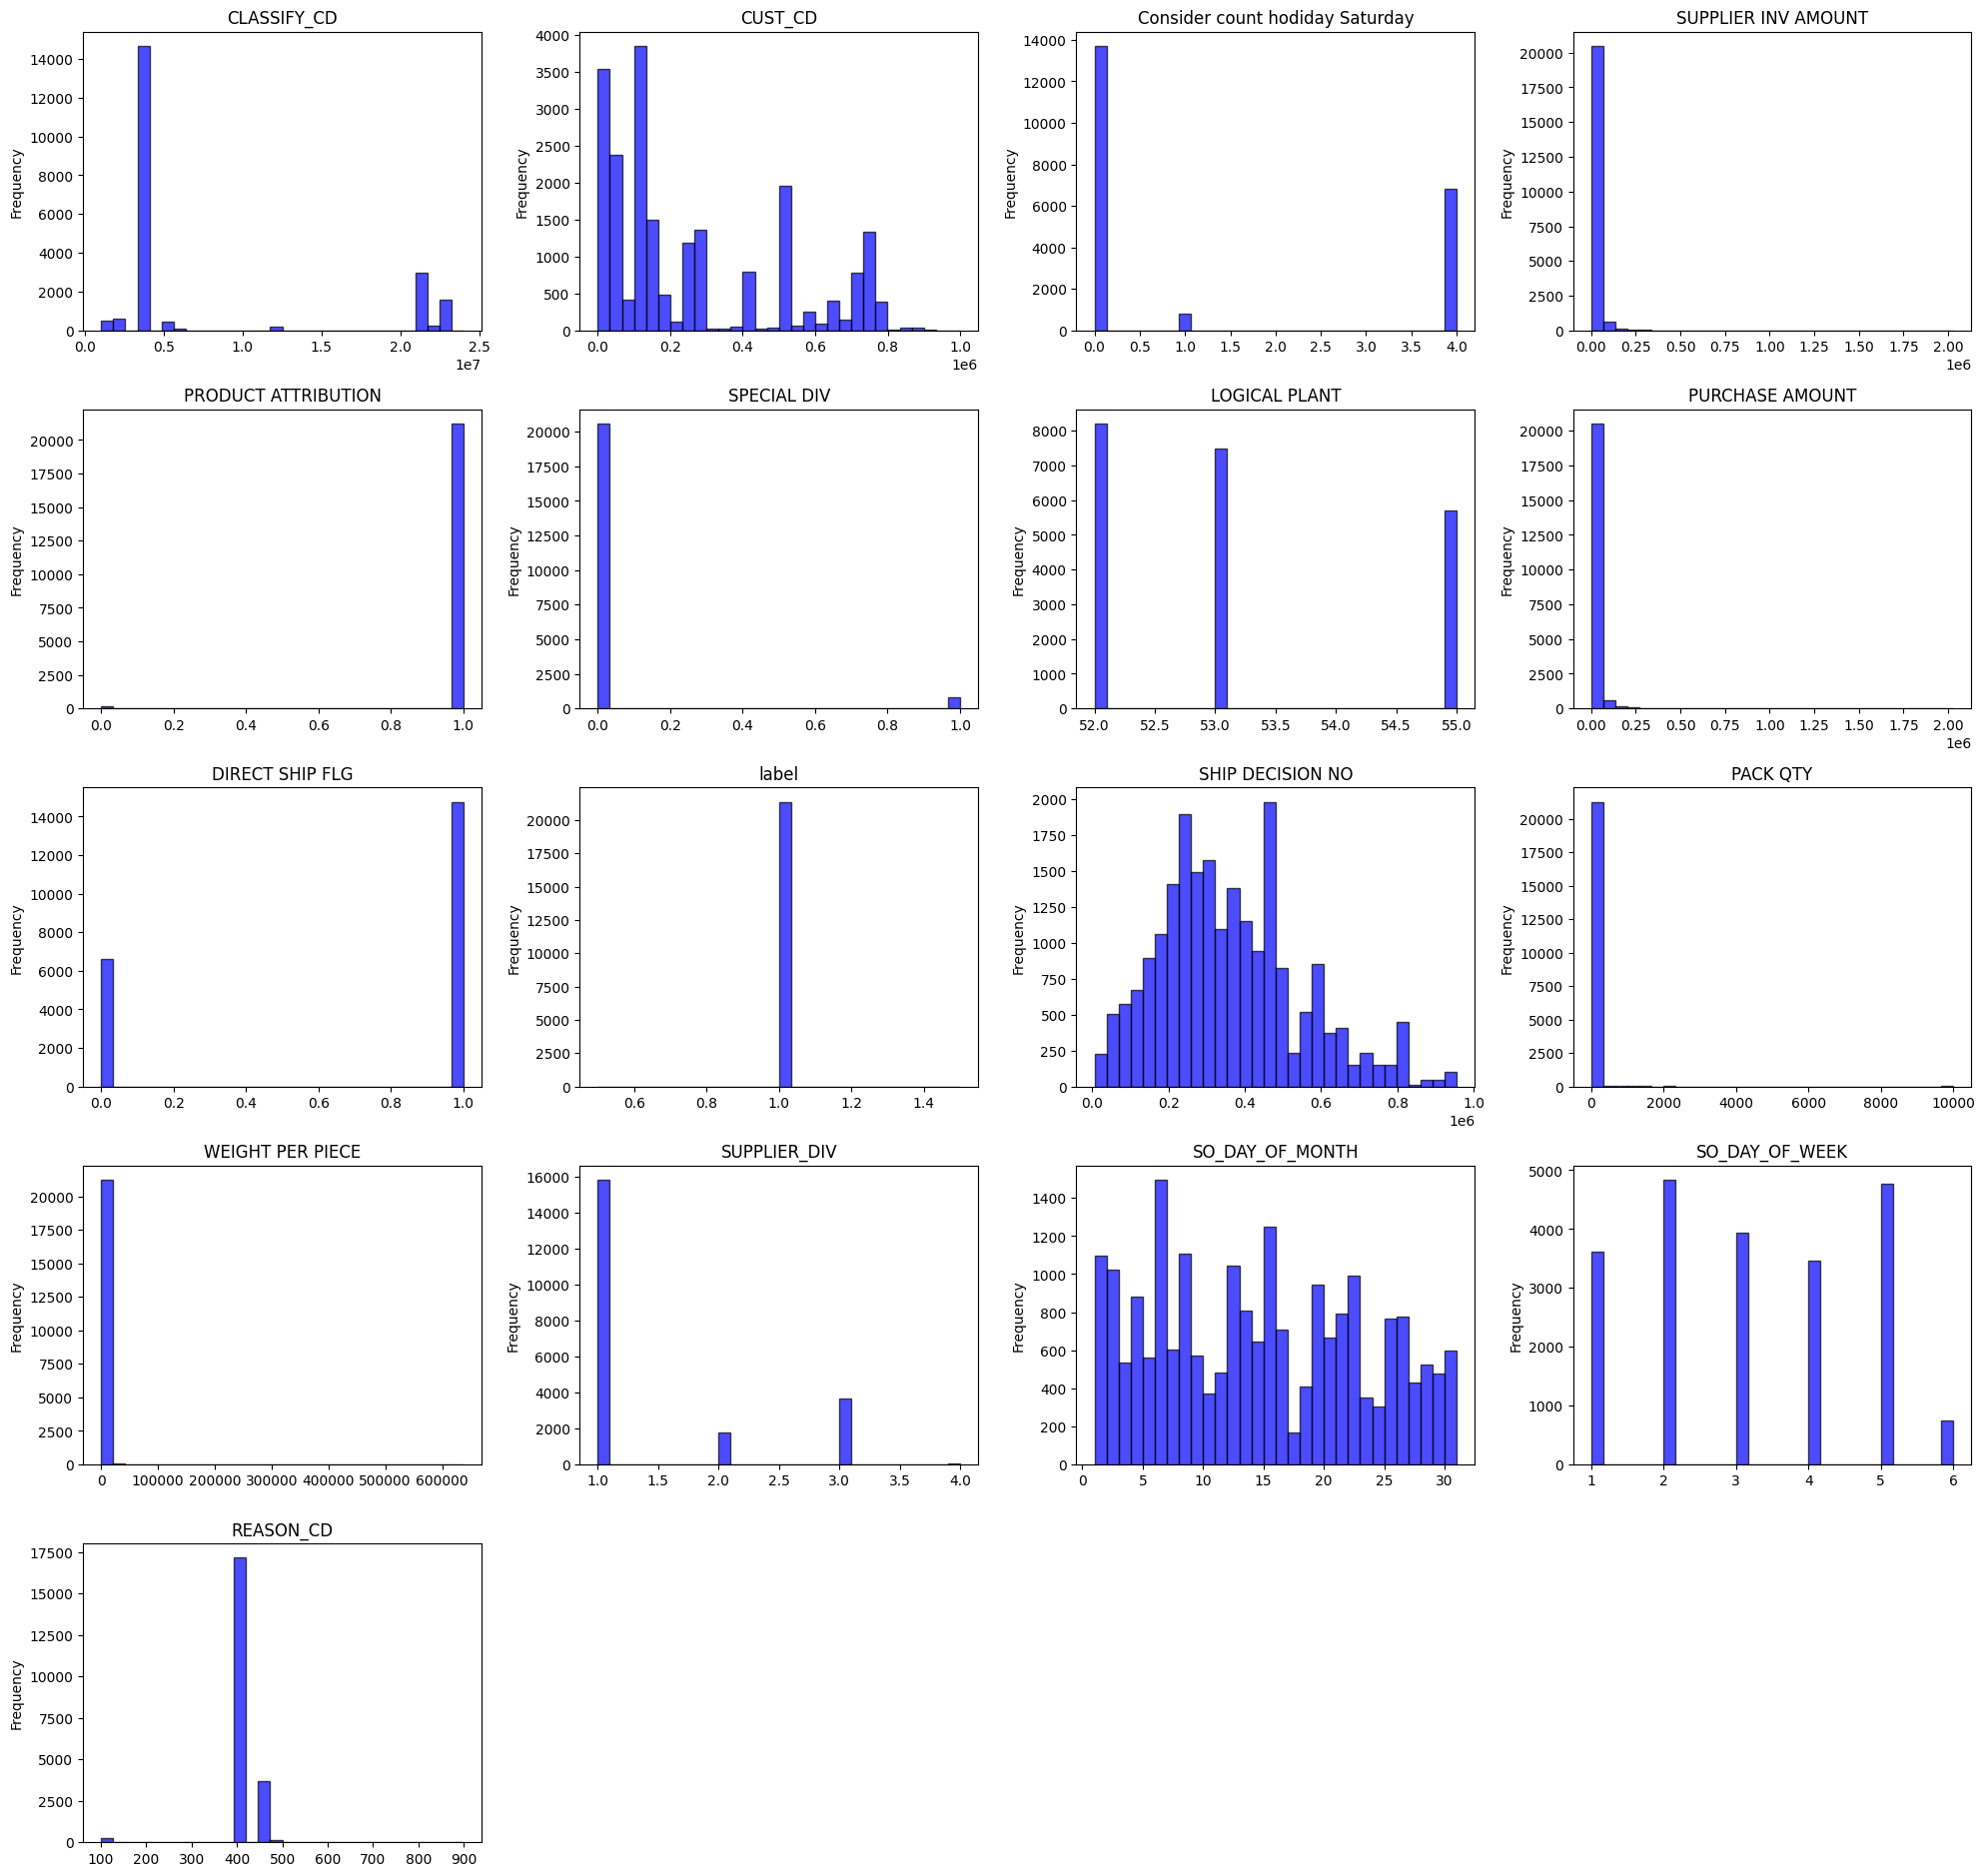

In [ ]:
# Data Distribution Visualization 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

# Select all numerical columns from the dataframe
numeric_columns = df_plot.select_dtypes(include=['number']).columns
num_cols = len(numeric_columns)

# Calculate optimal grid layout
cols = 4
rows = math.ceil(num_cols / cols)

# Create figure with improved styling
plt.style.use('seaborn-v0_8-whitegrid')  # Use a clean style
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows*3.5))
axes = axes.flatten()

# Color palette for better visualization
colors = sns.color_palette("viridis", 3)

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        # Create histogram with KDE overlay
        sns.histplot(df_plot[col].dropna(), bins=30, kde=True, ax=axes[i], 
                    color=colors[0], edgecolor='white', linewidth=0.8, alpha=0.7)
        
        # Add statistics to the plot
        mean_val = df_plot[col].mean()
        median_val = df_plot[col].median()
        
        # Add vertical lines for mean and median
        axes[i].axvline(mean_val, color=colors[1], linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        

## Xóa bỏ các cột có giá trị NaN

In [13]:
df_2 = df.dropna(axis = 1)

In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order date                       26217 non-null  object 
 1   SUBSIDIARY_CD                    26217 non-null  object 
 2   GLOBAL_NO                        26217 non-null  object 
 3   CLASSIFY_CD                      26217 non-null  int64  
 4   CUST_CD                          26217 non-null  int64  
 5   BRAND_CD                         26217 non-null  object 
 6   INNER_CD                         26217 non-null  object 
 7   SUPPLIER_CD                      26217 non-null  object 
 8   Consider count hodiday Saturday  26217 non-null  int64  
 9   SUPPLIER INV AMOUNT              26217 non-null  float64
 10  PACKING RANK                     26217 non-null  object 
 11  PRODUCT_CD                       26217 non-null  object 
 12  PRODUCT ATTRIBUTIO

In [15]:
df_plot2 = df_2.drop("Order date", axis = 1)

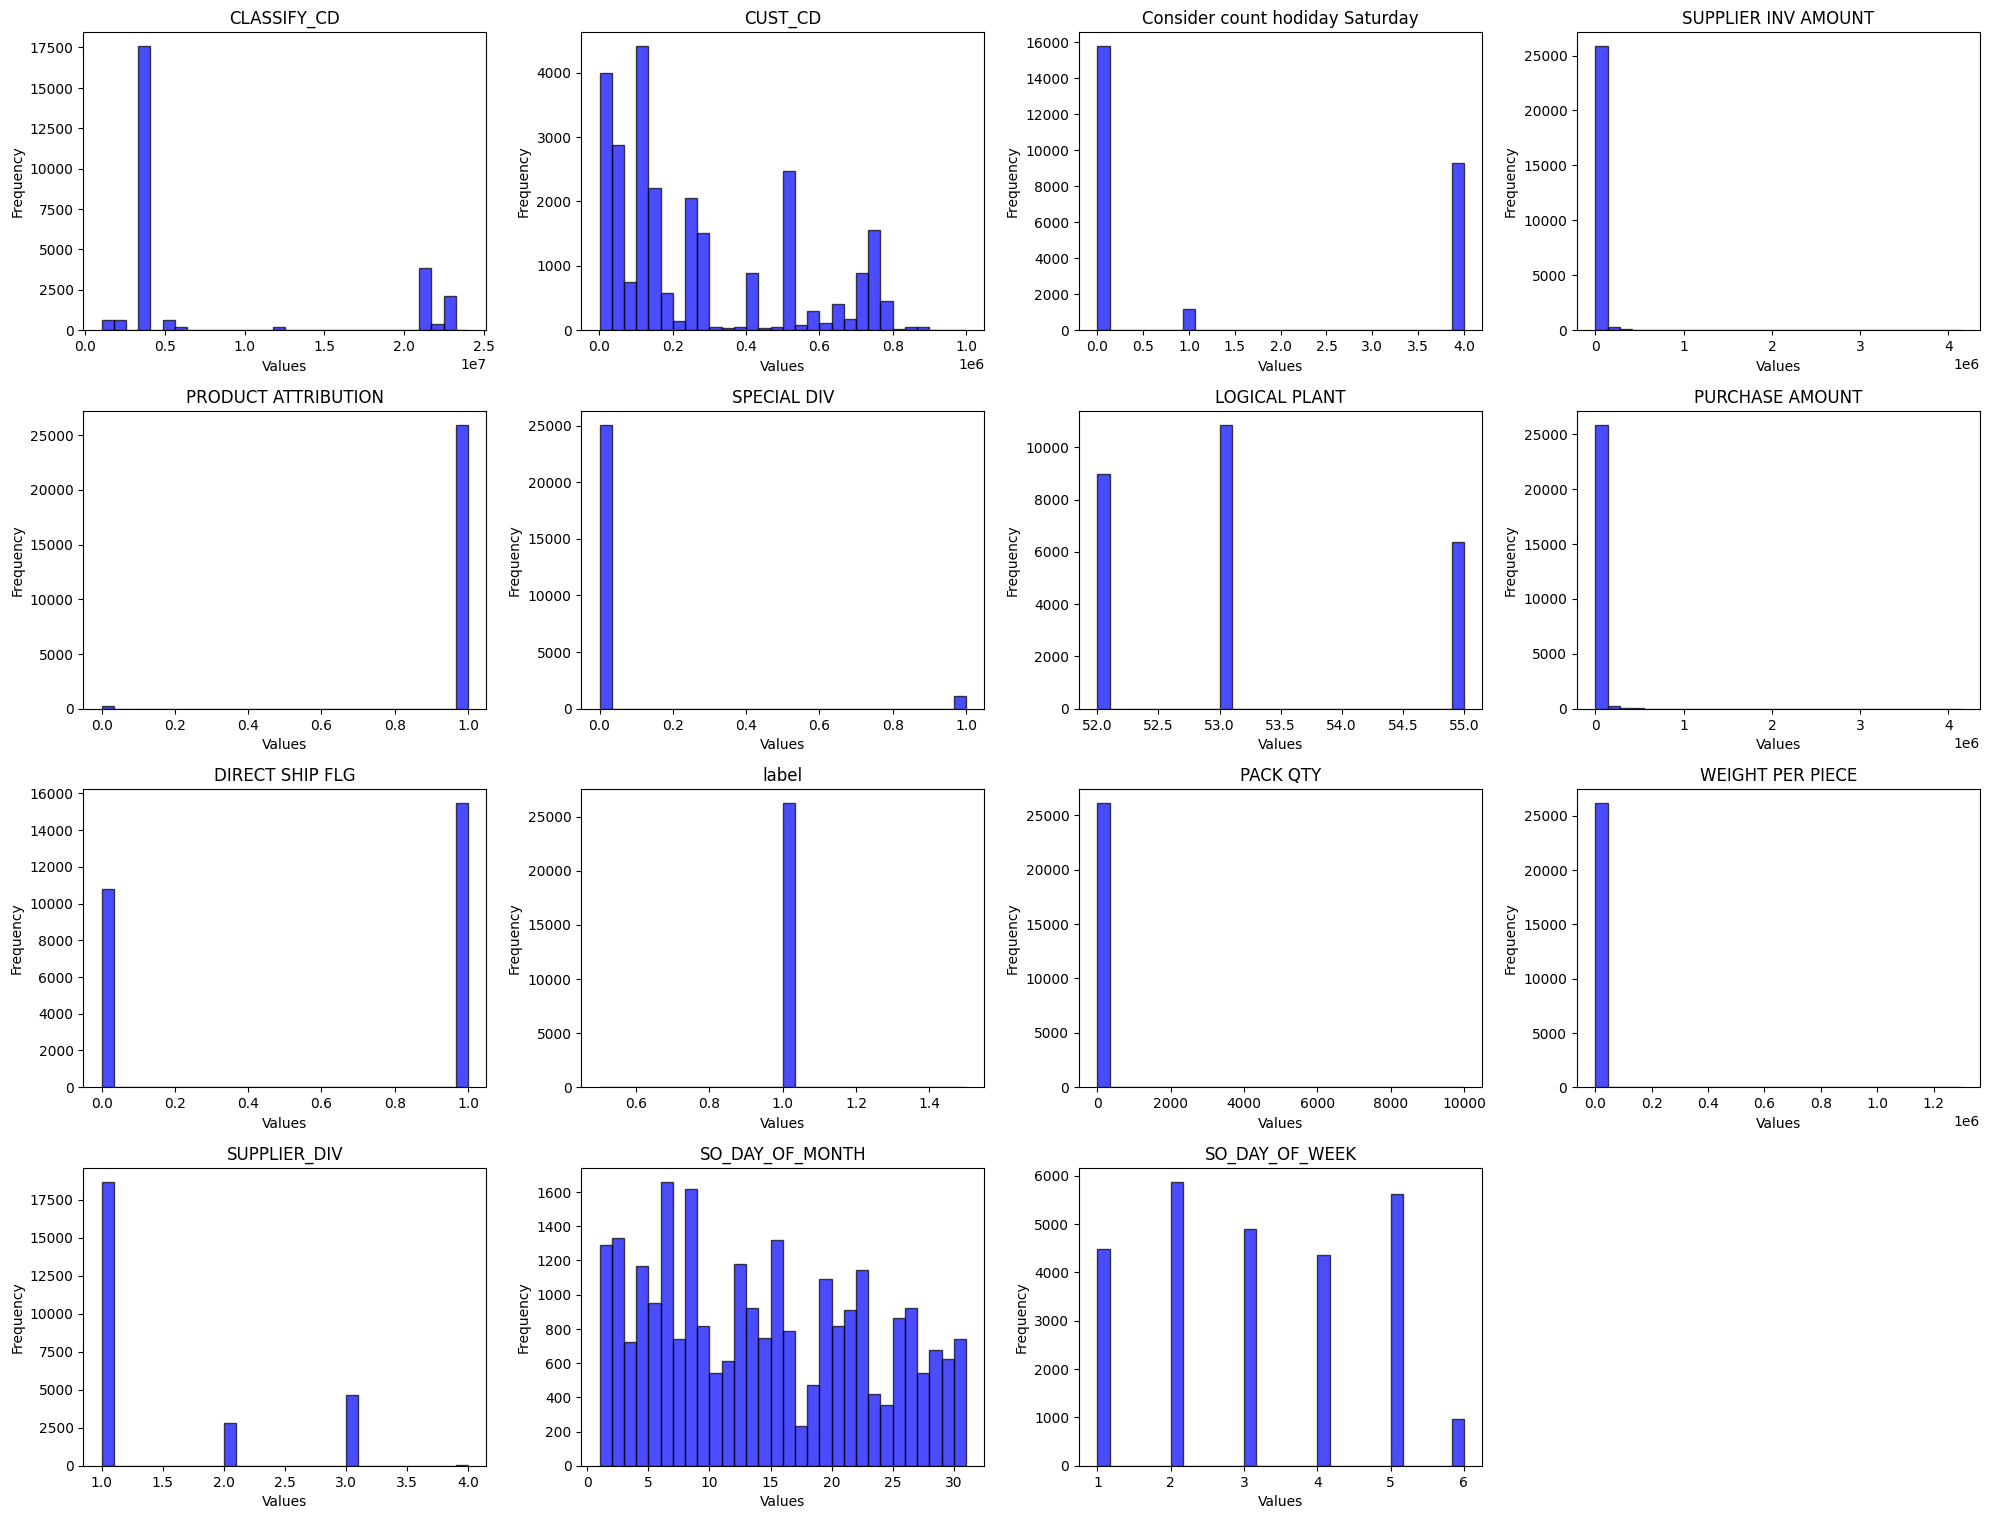

In [ ]:
# Biểu đồ thể hiện sự đa dạng dữ liệu

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

numeric_columns = df_plot2.select_dtypes(include=['number']).columns


num_cols = len(numeric_columns)



fig2, axes2 = plt.subplots(nrows=8, ncols=4, figsize=(20, 30))
axes2 = axes2.flatten()


for i, col in enumerate(numeric_columns[:32]):  # Giới hạn tối đa 32 cột
    axes2[i].hist(df_plot2[col].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes2[i].set_title(col)
    axes2[i].set_xlabel('Values')
    axes2[i].set_ylabel('Frequency')


for j in range(i + 1, len(axes2)):
    fig2.delaxes(axes2[j])

plt.tight_layout()
plt.show()